# Préparation pour la classification mutliclass

In [1]:
import pandas as pd
from test import convertCatToNum, drop_rows_with_missing, normalize, encode_player_names, split_data
import numpy as np

# on import toutes les données

df_atp_multi = pd.read_csv('all_matches_ATP_multi.csv')

In [2]:
df_atp_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45612 entries, 0 to 45611
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         45612 non-null  int64  
 1   Location    45612 non-null  object 
 2   Tournament  45612 non-null  object 
 3   Date        45612 non-null  object 
 4   Court       45612 non-null  object 
 5   Surface     45612 non-null  object 
 6   Round       45612 non-null  object 
 7   Best of     45597 non-null  float64
 8   Winner      45612 non-null  object 
 9   Loser       45612 non-null  object 
 10  WRank       45612 non-null  int64  
 11  LRank       45612 non-null  int64  
 12  Wsets       45612 non-null  float64
 13  Lsets       45612 non-null  float64
 14  Comment     45612 non-null  object 
 15  PSW         38252 non-null  float64
 16  PSL         38252 non-null  float64
 17  B365W       42234 non-null  float64
 18  B365L       42241 non-null  float64
 19  Series      29838 non-nul

In [3]:
df_atp_multi.head()

,ATP,Location,Tournament,Date,Court,Surface,Round,Best of,Winner,Loser,...,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,Series,y_multicat
0,3,Doha,Qatar Open,2001-01-01,Outdoor,Hard,1st Round,3.0,Kafelnikov Y.,Clavet F.,...,49,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,1
1,3,Doha,Qatar Open,2001-01-01,Outdoor,Hard,1st Round,3.0,Arazi H.,Portas A.,...,51,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,1
2,2,Chennai,TATA Open,2001-01-01,Outdoor,Hard,Quarterfinals,3.0,Robredo T.,Saulnier C.,...,130,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,1
3,2,Chennai,TATA Open,2001-01-01,Outdoor,Hard,Quarterfinals,3.0,Pless K.,Voinea A.,...,110,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,1
4,2,Chennai,TATA Open,2001-01-01,Outdoor,Hard,2nd Round,3.0,Tabara M.,Kempes E.,...,126,2.0,0.0,Completed,NaN,NaN,NaN,NaN,NaN,1


In [4]:
nombre_nan = df_atp_multi['B365L'].isna().sum()
nombre_nan

3371

In [5]:
df_atp_multi.dropna(subset=['B365W'], inplace=True)
df_atp_multi.dropna(subset=['B365L'], inplace=True)

In [6]:
# Calcul de la médiane de la colonne
median_value = df_atp_multi['Best of'].median()

# Remplacement des NaN par la médiane
df_atp_multi['Best of'].fillna(median_value, inplace=True)

In [7]:
drop_columns = ['PSW','PSL','Comment','Winner','Loser','Date','Tournament','Location','Wsets']

df_atp_multi = df_atp_multi.drop(drop_columns, axis=1)
df_atp_multi.head(2)

,ATP,Court,Surface,Round,Best of,WRank,LRank,Lsets,B365W,B365L,Series,y_multicat
1158,3,Outdoor,Hard,1st Round,3.0,32,60,1.0,1.286,3.25,NaN,0
1162,2,Outdoor,Hard,1st Round,3.0,15,107,1.0,1.143,5.00,NaN,0


In [8]:
cat_cols = ['Court','Surface','Round']
num_cols = ["Best of","Lsets","B365W","B365L"]

In [9]:
df_processed = convertCatToNum(df=df_atp_multi,cat_cols=cat_cols)
df = drop_rows_with_missing(df_processed,columns=["y_multicat","Series"])
df_final = normalize(df,num_cols)

 ===     Replace categorial variable     ===
 ===   Convert categorical to numerical  ===
 ===         drop missing values         ===
 ===            Normalize data           ===


In [10]:
df_final.head()

,ATP,Best of,WRank,LRank,Lsets,B365W,B365L,Series,y_multicat,Court_Indoor,...,Surface_Grass,Surface_Hard,Round_1st Round,Round_2nd Round,Round_3rd Round,Round_4th Round,Round_Quarterfinals,Round_Round Robin,Round_Semifinals,Round_The Final
1673,31,1.0,58,130,0.0,0.033045,0.009901,2000.0,1,0,...,0,0,1,0,0,0,0,0,0,0
1674,31,1.0,20,13,0.0,0.025955,0.012401,2000.0,1,0,...,0,0,0,0,1,0,0,0,0,0
1733,36,1.0,3,61,1.0,0.037864,0.008231,2000.0,0,0,...,1,0,0,1,0,0,0,0,0,0
1994,51,1.0,2,75,1.0,0.001364,0.089909,2000.0,0,0,...,0,1,1,0,0,0,0,0,0,0
1995,51,1.0,1,73,1.0,0.003773,0.059906,2000.0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [11]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train, X_test, y_train, y_test = split_data(df_final,target_column='y_multicat', test_size=0.2, random_state=42)

=== Splitting data into train and test sets ===
Data split completed.


In [13]:
X_train.shape

(23736, 22)

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Define model
model = DecisionTreeClassifier()


# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'max_features': ['auto', 'sqrt', 'log2']
}

search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)

best_params_deci_tree_bin = result.best_params_
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5049715257046149
Best Hyperparameters: {'max_features': 'log2', 'max_depth': 25}


In [15]:
model = DecisionTreeClassifier(**best_params_deci_tree_bin)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, max_features='log2')

In [16]:
y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46      1024
           1       0.47      0.50      0.48      1795
           2       0.52      0.53      0.53      1153
           3       0.51      0.48      0.50      1962

    accuracy                           0.49      5934
   macro avg       0.49      0.49      0.49      5934
weighted avg       0.49      0.49      0.49      5934



In [17]:
# On va garder le score d'accuracy pour pouvoir le comparer avec d'autres modèle
from sklearn.metrics import accuracy_score

DescisionTree_score_multi = accuracy_score(y_test, y_pred_test)
DescisionTree_score_multi

0.4924165824064712

# Xgboost

In [18]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the XGBoost model
model = xgb.XGBClassifier()

# Define the search space (parameter grid)
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of boosting rounds
    'max_depth': np.arange(3, 10),  # Maximum tree depth
    'learning_rate': [0.001,0.005,0.01, 0.1],  # Step size shrinkage used in update to prevent overfitting
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
}

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=1)

# Execute the search
result = search.fit(X_train, y_train)

best_param_Xgboost_multi=result.best_params_

# Summarize the results
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5190852591864431
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.001, 'colsample_bytree': 0.8}


In [19]:
model = xgb.XGBClassifier(**best_param_Xgboost_multi)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [20]:
y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.01      0.02      1024
           1       0.44      0.02      0.04      1795
           2       0.53      0.99      0.69      1153
           3       0.52      0.97      0.68      1962

    accuracy                           0.52      5934
   macro avg       0.50      0.50      0.36      5934
weighted avg       0.50      0.52      0.38      5934



In [21]:
Xgboost_score_multi = accuracy_score(y_test, y_pred_test)
Xgboost_score_multi

0.523087293562521

# CatBoost

In [23]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the CatBoost model
model = CatBoostClassifier()

# Define the search space (parameter grid)
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting rounds
    'depth': [8,10,12],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage used in update
    'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees at each level
}

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=1)

# Execute the search
result = search.fit(X_train, y_train)

best_param_Xgboost_multi = result.best_params_

# Summarize the results
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\catboost\core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\sit

0:	learn: 1.3765740	total: 175ms	remaining: 17.4s
1:	learn: 1.3667875	total: 182ms	remaining: 8.89s
2:	learn: 1.3572084	total: 192ms	remaining: 6.19s
3:	learn: 1.3480127	total: 217ms	remaining: 5.22s
4:	learn: 1.3388525	total: 232ms	remaining: 4.41s
5:	learn: 1.3300797	total: 254ms	remaining: 3.99s
6:	learn: 1.3213191	total: 276ms	remaining: 3.67s
7:	learn: 1.3126872	total: 290ms	remaining: 3.34s
8:	learn: 1.3043275	total: 312ms	remaining: 3.15s
9:	learn: 1.2962207	total: 344ms	remaining: 3.1s
10:	learn: 1.2881590	total: 371ms	remaining: 3s
11:	learn: 1.2803361	total: 398ms	remaining: 2.92s
12:	learn: 1.2724498	total: 427ms	remaining: 2.85s
13:	learn: 1.2646764	total: 439ms	remaining: 2.7s
14:	learn: 1.2571014	total: 467ms	remaining: 2.65s
15:	learn: 1.2496984	total: 493ms	remaining: 2.59s
16:	learn: 1.2424587	total: 515ms	remaining: 2.52s
17:	learn: 1.2353957	total: 539ms	remaining: 2.45s
18:	learn: 1.2282714	total: 566ms	remaining: 2.41s
19:	learn: 1.2213902	total: 593ms	remaining: 2

In [24]:
model = CatBoostClassifier(**best_param_Xgboost_multi)
model.fit(X_train, y_train)

0:	learn: 1.3765740	total: 44.2ms	remaining: 4.38s
1:	learn: 1.3667875	total: 59.8ms	remaining: 2.93s
2:	learn: 1.3572084	total: 75.3ms	remaining: 2.44s
3:	learn: 1.3480127	total: 107ms	remaining: 2.57s
4:	learn: 1.3388525	total: 127ms	remaining: 2.42s
5:	learn: 1.3300797	total: 160ms	remaining: 2.5s
6:	learn: 1.3213191	total: 191ms	remaining: 2.54s
7:	learn: 1.3126872	total: 210ms	remaining: 2.42s
8:	learn: 1.3043275	total: 251ms	remaining: 2.54s
9:	learn: 1.2962207	total: 281ms	remaining: 2.53s
10:	learn: 1.2881590	total: 309ms	remaining: 2.5s
11:	learn: 1.2803361	total: 337ms	remaining: 2.47s
12:	learn: 1.2724498	total: 363ms	remaining: 2.43s
13:	learn: 1.2646764	total: 377ms	remaining: 2.32s
14:	learn: 1.2571014	total: 409ms	remaining: 2.31s
15:	learn: 1.2496984	total: 441ms	remaining: 2.32s
16:	learn: 1.2424587	total: 471ms	remaining: 2.3s
17:	learn: 1.2353957	total: 509ms	remaining: 2.32s
18:	learn: 1.2282714	total: 552ms	remaining: 2.35s
19:	learn: 1.2213902	total: 608ms	remaini

In [25]:
y_pred_test = model.predict(X_test)
y_pred_test_prob = model.predict_proba(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.59      0.02      0.03      1024
           1       0.46      0.02      0.04      1795
           2       0.53      0.99      0.69      1153
           3       0.52      0.98      0.68      1962

    accuracy                           0.52      5934
   macro avg       0.53      0.50      0.36      5934
weighted avg       0.52      0.52      0.38      5934



In [26]:
catboost_score_multi = accuracy_score(y_test, y_pred_test)
catboost_score_multi

0.5247724974721941

# Logistique regression

In [28]:
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression()

# define evaluation
# gkf = GroupKFold(n_splits=3) if not spec as cv= in the randomized search default is 5 fold cv

# define search space
param_grid = {
    'C' : np.logspace(0, 4, num=10),
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'sag']
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)

best_params_logist_reg_multi = result.best_params_
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, 

Best Score: 0.5158410523329894
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}


In [30]:
model = LogisticRegression(**best_params_logist_reg_multi)
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [31]:
y_pred_test = model.predict(X_test)
y_pred_test_prob = model.predict_proba(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.53      0.04      0.07      1024
           1       0.50      0.09      0.16      1795
           2       0.53      0.97      0.69      1153
           3       0.52      0.91      0.67      1962

    accuracy                           0.53      5934
   macro avg       0.52      0.50      0.40      5934
weighted avg       0.52      0.53      0.41      5934



In [32]:
logisti_reg_score_multi = accuracy_score(y_test, y_pred_test)
logisti_reg_score_multi

0.525278058645096

# RandomForestClassifier

In [33]:
model = RandomForestClassifier()

# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'n_estimators': list(range(80, 200, 10))
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)

best_params_random_multi = result.best_params_
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.506235215679341
Best Hyperparameters: {'n_estimators': 190, 'max_depth': 65}


In [34]:
model = RandomForestClassifier(**best_params_random_multi)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=65, n_estimators=190)

In [35]:
y_pred_test = model.predict(X_test)
y_pred_test_prob = model.predict_proba(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.46      0.42      0.44      1024
           1       0.46      0.43      0.44      1795
           2       0.52      0.56      0.54      1153
           3       0.51      0.53      0.52      1962

    accuracy                           0.49      5934
   macro avg       0.49      0.49      0.48      5934
weighted avg       0.49      0.49      0.49      5934



In [36]:
random_score_multi = accuracy_score(y_test, y_pred_test)
random_score_multi

0.48702392989551735

# MPLClassifier

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()
# Couche de sortie multiclasse 
# donc la fonction d’activation des neurones de la couche de sortie est 'Softmax'
mlp.out_activation_ = 'Softmax'
mlp.n_outputs_ = 1

param_grid = {
    'hidden_layer_sizes': [(30, 20, 15, 25),(50, 40, 30,20)],
    'activation':['relu', 'tanh', 'logistic'],
    'solver':  ['adam', 'lbfgs', 'sgd'],
}

grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(30, 20, 15, 25),
                                                (50, 40, 30, 20)],
                         'solver': ['adam', 'lbfgs', 'sgd']})

In [38]:
best_params_mlp_multi = grid_search.best_params_
# meilleur parametre
print(f'Best parameters found : {best_params_mlp_multi}')

Best parameters found : {'activation': 'logistic', 'hidden_layer_sizes': (30, 20, 15, 25), 'solver': 'adam'}


In [39]:
best_mlp = MLPClassifier(**best_params_mlp_multi)
best_mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 20, 15, 25))

In [40]:
y_pred_test = best_mlp.predict(X_test)
y_pred_test_prob = best_mlp.predict_proba(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1024
           1       0.00      0.00      0.00      1795
           2       0.53      1.00      0.69      1153
           3       0.52      1.00      0.69      1962

    accuracy                           0.52      5934
   macro avg       0.26      0.50      0.34      5934
weighted avg       0.28      0.52      0.36      5934



c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
mlp_multi = accuracy_score(y_test, y_pred_test)
mlp_multi

0.5249410178631615

# Comparaison modèles multiclass

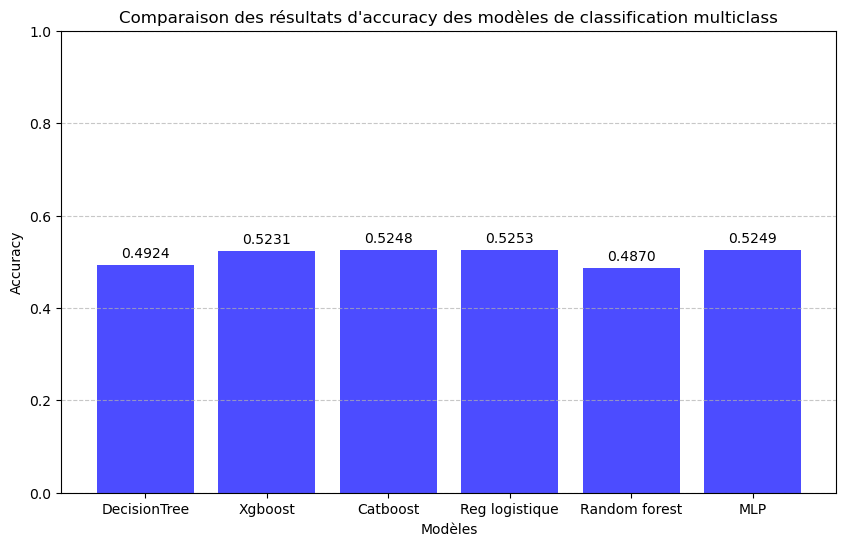

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Scores d'accuracy des différents modèles
accuracy_scores = [DescisionTree_score_multi, Xgboost_score_multi, catboost_score_multi, logisti_reg_score_multi, random_score_multi, mlp_multi] 

# Noms des modèles correspondants
model_names = ['DecisionTree', 'Xgboost', 'Catboost', 'Reg logistique', 'Random forest', 'MLP'] 

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue', alpha=0.7)
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.title('Comparaison des résultats d\'accuracy des modèles de classification multiclass')
plt.ylim(0, 1)  # Assurez-vous que l'axe y va de 0 à 1 pour l'accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage des scores sur chaque barre
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Affichage de l'histogramme
plt.show()